This notebook recreates Figure 5 in Merdith et al. (2019) 'Rift and Plate Boundary Evolution across Two Supercontinent Cycles'. 

It loops through a series of metadata provided by other publications in relation to changes in arc length, rifting, passive margins, zircon data etc.

References

Bradley, D.C., 2008. Passive margins through earth history. Earth-Science Reviews, 91(1-4), pp.1-26.

Cao, W., Lee, C.T.A. and Lackey, J.S., 2017. Episodic nature of continental arc activity since 750 Ma: A global compilation. Earth and Planetary Science Letters, 461, pp.85-95.

Condie, K.C., 2002. The supercontinent cycle: are there two patterns of cyclicity?. Journal of African Earth Sciences, 35(2), pp.179-183.

Ernst, R.E., Bleeker, W., Söderlund, U. and Kerr, A.C., 2013. Large Igneous Provinces and supercontinents: Toward completing the plate tectonic revolution.

Merdith, A.S., Williams, S.E., Brune, S., Collins, A.S. and Müller, R.D. 2019. Rift and Plate Boundary Evolution across Two Supercontinent Cycles. Global and Planetary Change, 173, pp.1–14 

Voice, P.J., Kowalewski, M. and Eriksson, K.A., 2011. Quantifying the timing and rate of crustal evolution: Global compilation of radiometrically dated detrital zircon grains. The Journal of Geology, 119(2), pp.109-126.

In [1]:
import pygplates
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [9]:
#setbasedir for loading reconstruction files
basedir = './Sample_data/'


df_voice_zircon = pd.read_csv('%sVoice-2011-zircon.csv' % basedir)
df_cao_continent_arc_length = pd.read_csv('%sCao-2017-arc-length.csv' % basedir)
df_ernst_LIP = pd.read_csv('%sSimple_table_ersnt_2013.csv' % basedir)
df_condie_rift = pd.read_csv('%sCondie-2002-rifting-episodes.csv' % basedir)
df_brad_modern = pd.read_csv('%sBradley_table1.csv' % basedir)
df_brad_ancient = pd.read_csv('%sBradley_table2.csv' % basedir)
with open('%scont_arc_length.pickle' % basedir, 'rb') as handle:
    subduction_lengths = pickle.load(handle)

/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We will do Bradley (2008) passive margin length first. his study has two tables, one for modern times (200-0 Ma) and one for ancient time (back to the Archaean).  Modern passive margins are still preserved in situ without collision, while ancient ones have inverted already.

In [10]:
#wrangle the data to filter/control it
df_brad_ancient = df_brad_ancient.loc[df_brad_ancient['Quality'] != 'D'] #filter out poor quality 
df_brad_ancient['Start date (Ma)'] = df_brad_ancient['Start date (Ma)'].astype(int)
df_brad_ancient['End date (Ma)'] = df_brad_ancient['End date (Ma)'].astype(int)
df_brad_ancient = df_brad_ancient.loc[df_brad_ancient['Start date (Ma)'] < 1000]

In [11]:
#loop through times and append
times = np.arange(0,1010,10)

ancient_passive_margin_length = []
modern_passive_margin_length = []
for time in times:
    
    valid_margins = df_brad_modern[(df_brad_modern.Oldest_age>=time) & (0<=time)]
    modern_passive_margin_length.append(np.sum(valid_margins['Length']))
    valid_margins = df_brad_ancient[(df_brad_ancient['Start date (Ma)'] >= time) & (df_brad_ancient['End date (Ma)'] <= time)]
    ancient_passive_margin_length.append(np.sum(valid_margins['Length (km)']))

Text(0.5, 1.0, 'Continental Breakup Length')

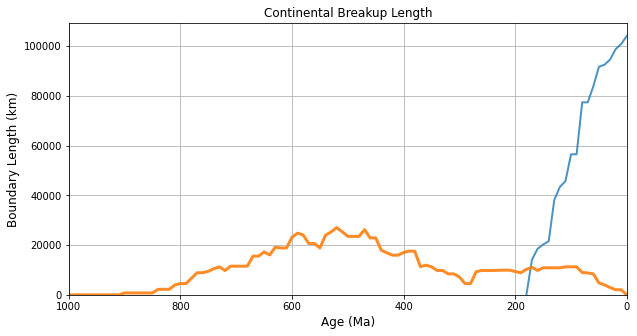

In [12]:
#plot results, Fig.4 from Bradley (2008)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(times[:19],modern_passive_margin_length[:19],linewidth=2,alpha=0.8)
ax.plot(times,ancient_passive_margin_length,linewidth=3,alpha=0.9)

ax.set_ylabel('Boundary Length (km)',fontsize=12)
ax.set_xlabel('Age (Ma)',fontsize=12)
ax.set_xlim((1000,0))
ax.set_ylim(0)
ax.grid()
ax.set_title('Continental Breakup Length')

Now Condie (2002) rifting episodes, just for the last 1000 Ma

In [13]:
#for some reason there is a NaN row we need to drop...
df_condie_rift = df_condie_rift.drop(df_condie_rift.index[-1])

Text(0, 0.5, 'No. of Rift events')

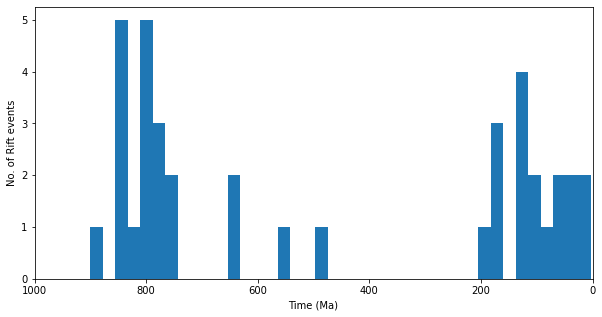

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(df_condie_rift['average'], bins=40)
ax.set_xlim(1000,0)
ax.set_xlabel('Time (Ma)')
ax.set_ylabel('No. of Rift events')

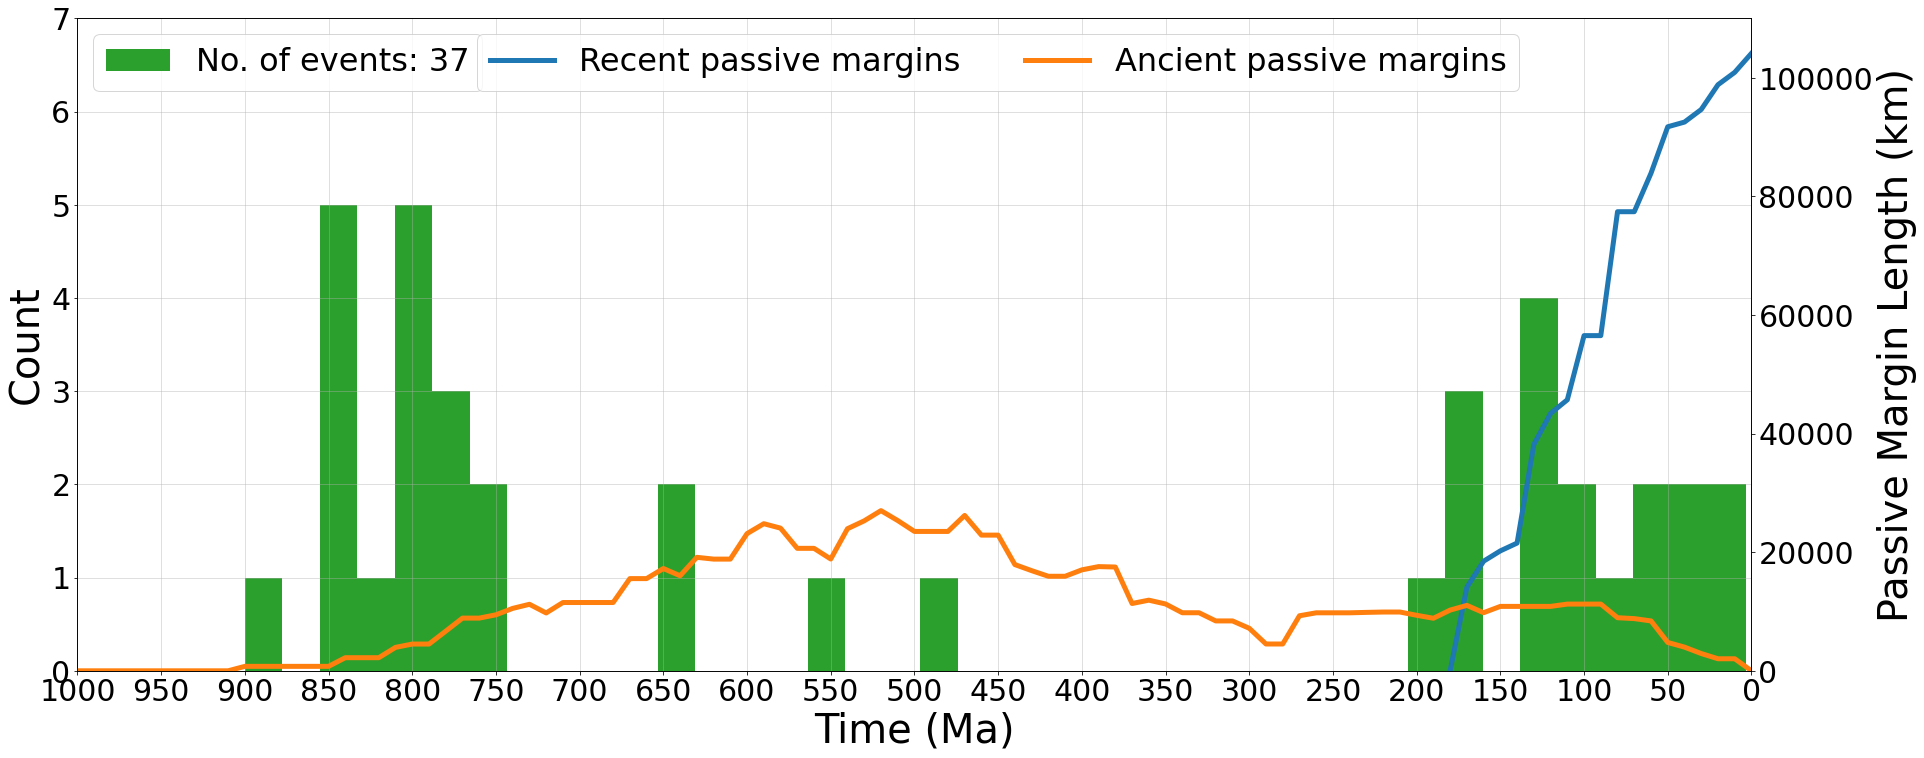

In [15]:
#now to plot Condie (2002) rift events and Bradley (2008) passive margin lengths
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
ax2 = ax1.twinx()
ax2.plot(times[:19], modern_passive_margin_length[:19],linewidth=5, label='Recent passive margins')
ax2.plot(times, ancient_passive_margin_length, linewidth=5, label='Ancient passive margins')
ax1.hist(df_condie_rift['average'], color='#2ca02c', bins=40, label='No. of events: 37')
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax2.tick_params(axis='y', labelsize=30)
ax1.set_xlim(1000,0)
ax1.set_ylim(0,7)
ax2.set_ylim(0,110000)
ax1.set_ylabel('Count', fontsize=40)
ax1.set_xlabel('Time (Ma)', fontsize=40)
ax2.set_ylabel('Passive Margin Length (km)',fontsize=40)
ax1.set_xticks(np.arange(0,1050,50))
ax1.xaxis.grid(True, alpha=.5)
ax1.yaxis.grid(True, alpha=.5)
ax1.legend(loc='upper left',fontsize=32)
ax2.legend(loc='upper center',fontsize=32, ncol=2,bbox_to_anchor=(.55,1))

LIPS after Ernst et al. (2013)

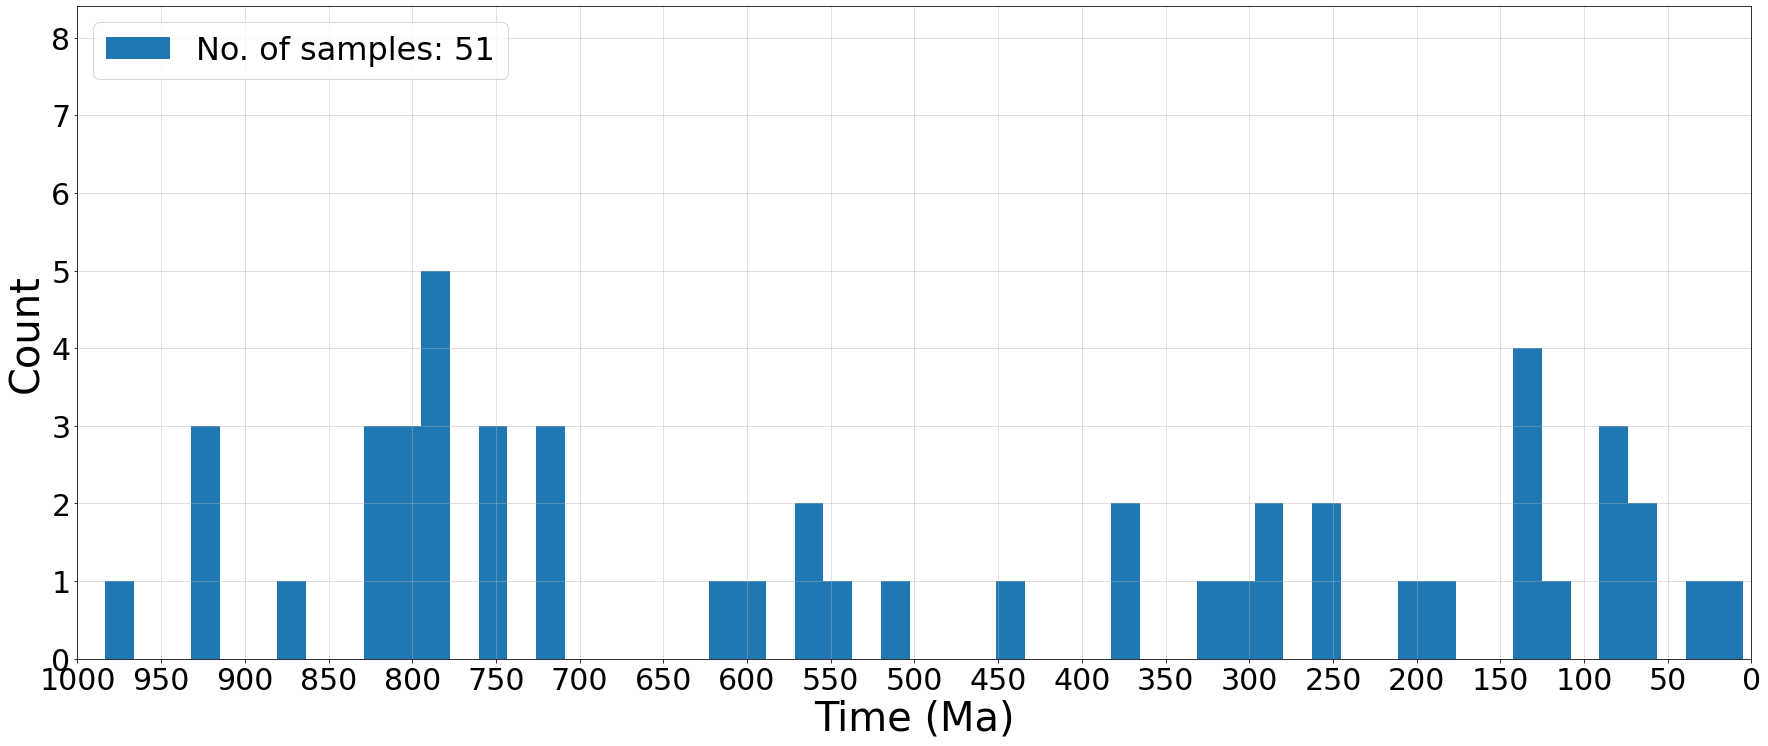

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
ax.hist(df_ernst_LIP['Recorded age'], bins=150, label='No. of samples: 51')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(1000,0)
ax.set_ylabel('Count', fontsize=40)
ax.set_xlabel('Time (Ma)', fontsize=40)
ax.set_xticks(np.arange(0,1050,50))
ax.xaxis.grid(True, alpha=.5)
ax.yaxis.grid(True, alpha=.5)
ax.legend(loc='upper left',fontsize=32)

Arc length from this manuscript and Cao et al. (2017)

In [21]:
cao_times = np.arange(0,751,1)
cao_arc_length = []
for time in cao_times:
    time_step_length = 0.
    for row, i in df_cao_continent_arc_length.iterrows():
        #time_step_length = []
        if time < i['Onset time [Ma]'] and time >= i['Termination time [Ma]']:
            time_step_length += i['ave/pref. length [km]']
            
    cao_arc_length.append(time_step_length)

np.savetxt('./cao_lengths.csv', np.c_[cao_arc_length], delimiter=',')

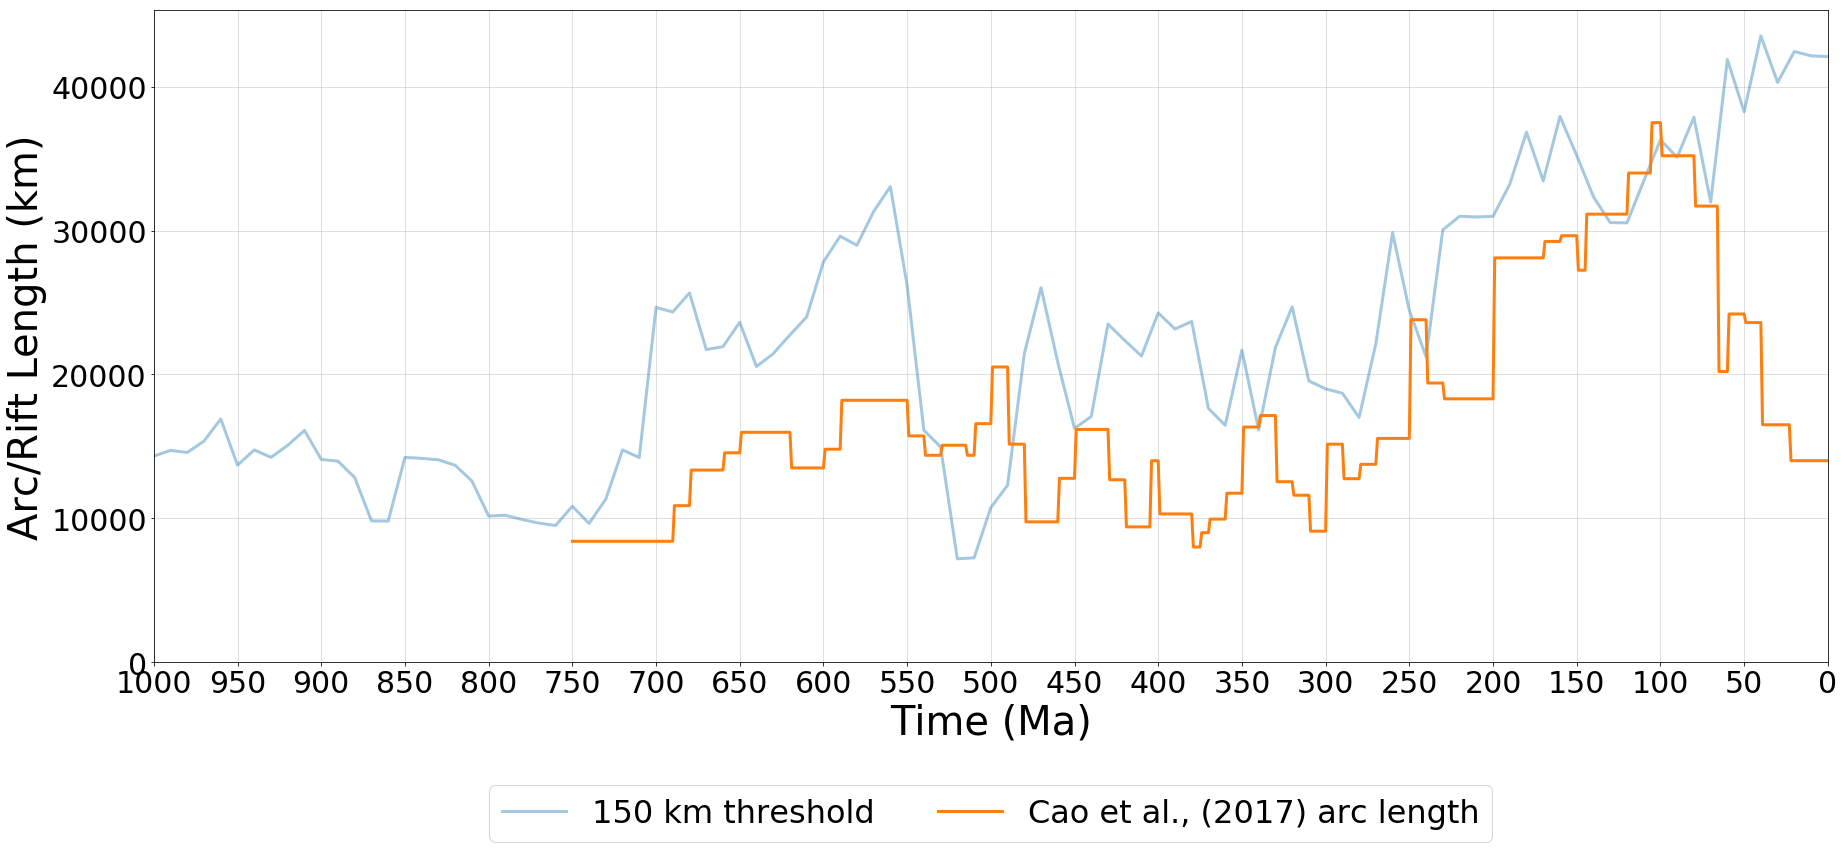

In [12]:
#plot arc length
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,12),facecolor='w', edgecolor='k')
#ax1.plot(plotting_times2, subduction_lengths[100], linewidth=3, alpha=0.4, label='100 km threshold')
ax.plot(times, subduction_lengths[150], linewidth=3, alpha=0.4, label='150 km threshold')
#ax.plot(plotting_times2, subduction_lengths[300], linewidth=3, alpha=0.4, label='300 km threshold')
#ax.plot(plotting_times2, subduction_lengths['ocean'], linewidth=3, label='ocean arcs')
ax.plot(cao_times, cao_arc_length, linewidth=3, label='Cao et al., (2017) arc length')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(1000,0)
ax.set_ylim(0)
ax.set_xlabel('Time (Ma)', fontsize=40)
ax.set_ylabel('Arc/Rift Length (km)', fontsize=40)
ax.set_xticks(np.arange(0,1050,50))
ax.xaxis.grid(True, alpha=.5)
ax.yaxis.grid(True, alpha=.5)
ax.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,-.3),fontsize=32)

Voice et al. (2011) Zircon data

In [13]:
df_voice_zircon_age_d = df_voice_zircon.filter(items = ['best age 2 (Ma)'])
df_voice_zircon_age_d = df_voice_zircon_age_d[df_voice_zircon['best age 2 (Ma)'] < 1000]

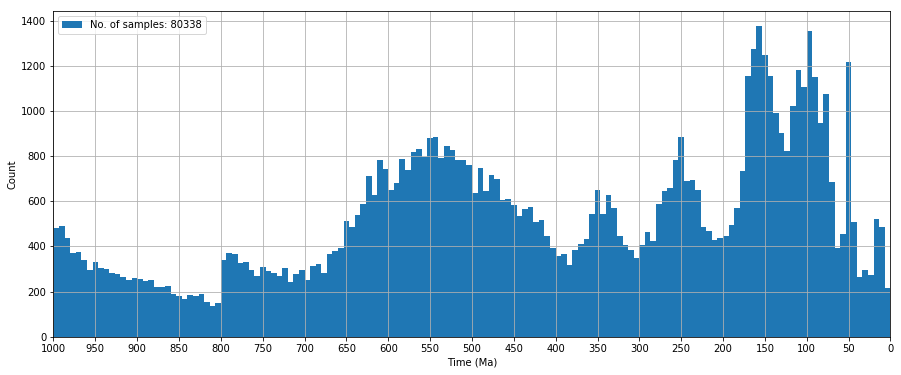

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
ax.hist(df_voice_zircon_age_d['best age 2 (Ma)'], bins=150, label='No. of samples: %s' % len(df_voice_zircon_age_d))
ax.set_xlim(1000,0)
ax.set_ylabel('Count')
ax.set_xlabel('Time (Ma)')
ax.set_xticks(np.arange(0,1050,50))
ax.grid()
ax.legend(loc='upper left')